<a href="https://colab.research.google.com/github/chathur03/portfolio_website/blob/main/NightHack_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Housing_dataset.csv')

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4.0,4.0,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3.0,2.0,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4.0,2.0,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4.0,1.0,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,542.000000,543.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.963100,1.283610,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738763,0.497826,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
df.isnull().sum()

price               0
area                0
bedrooms            3
bathrooms           2
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     1
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

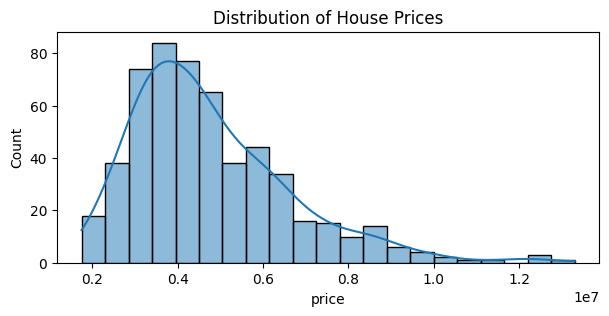

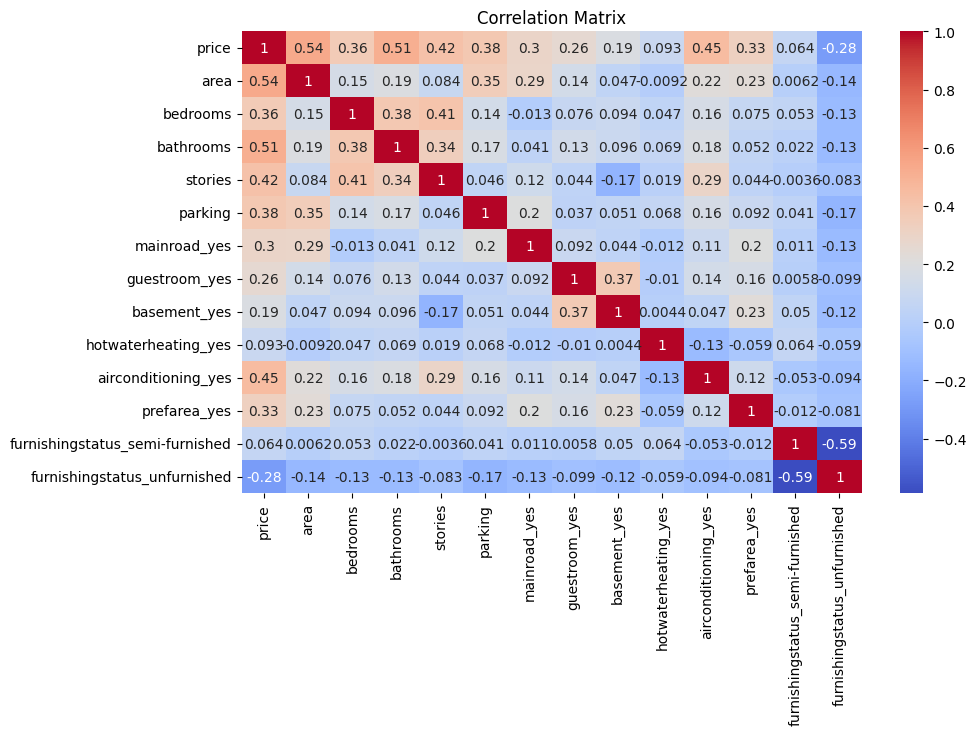

In [13]:
df = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(7, 3))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

plt.figure(figsize=(10,6 ))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



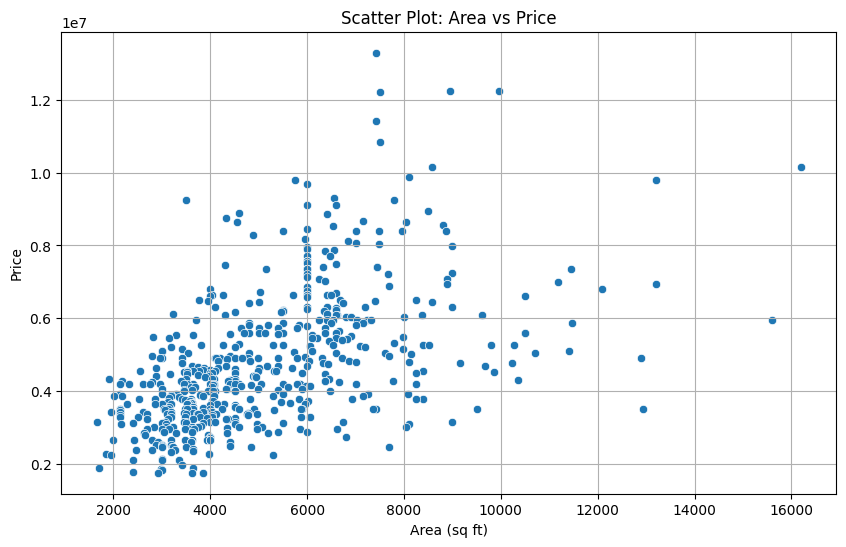

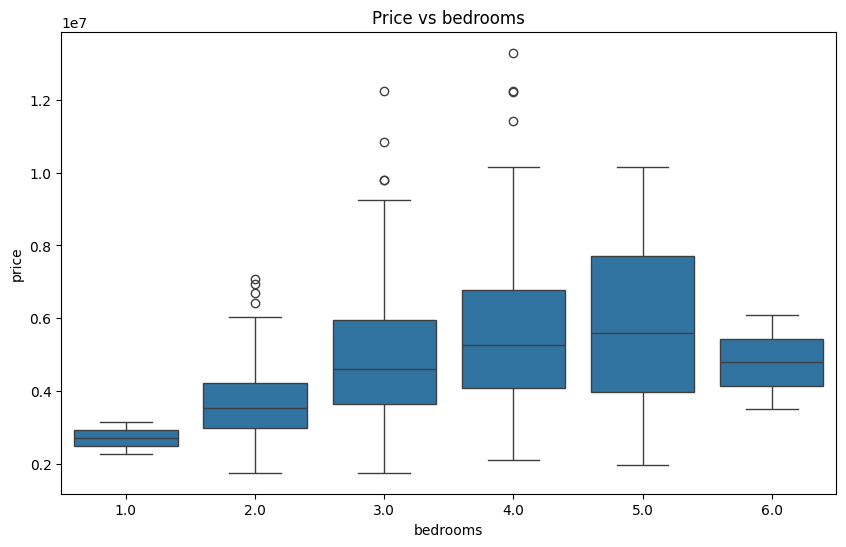

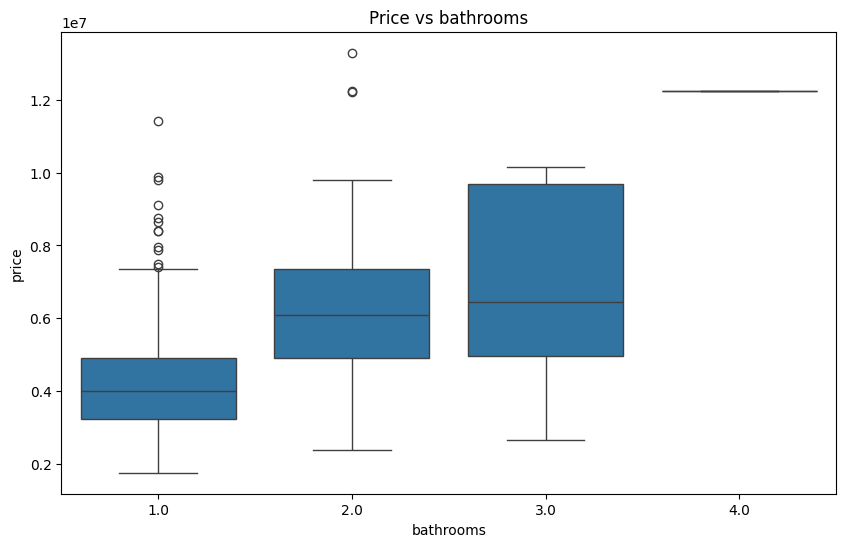

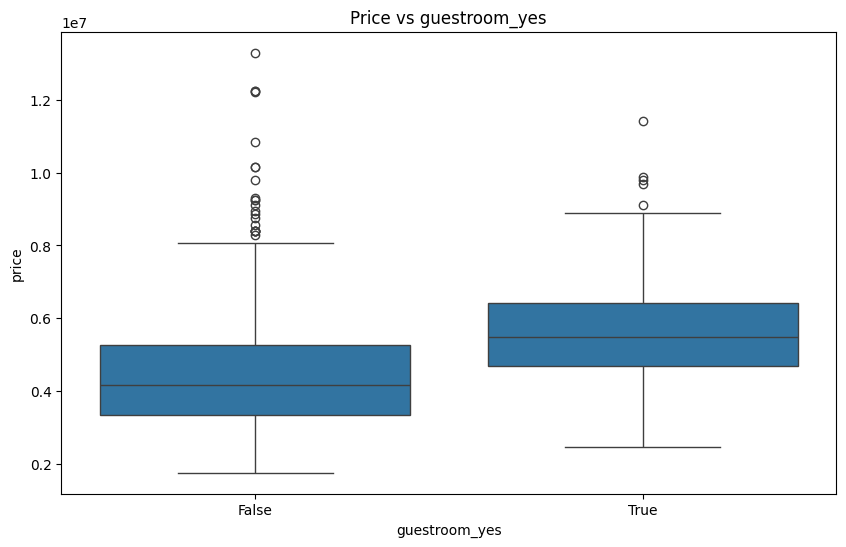

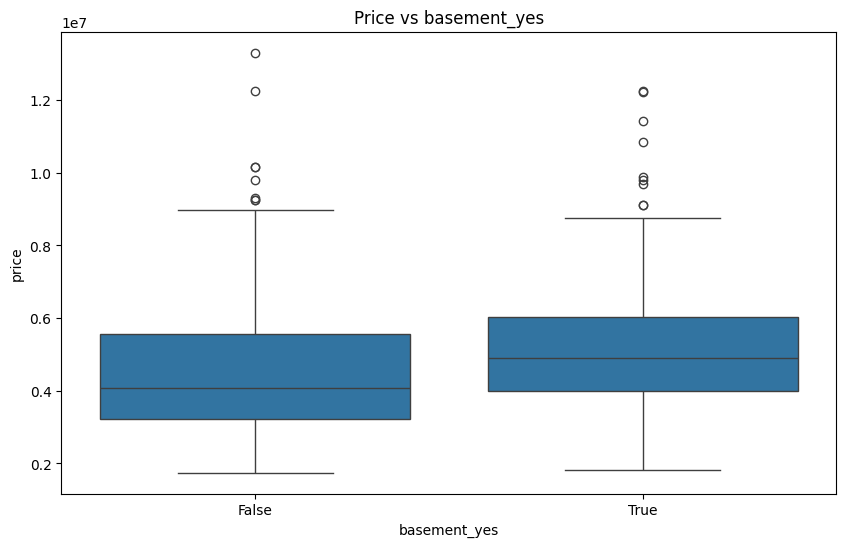

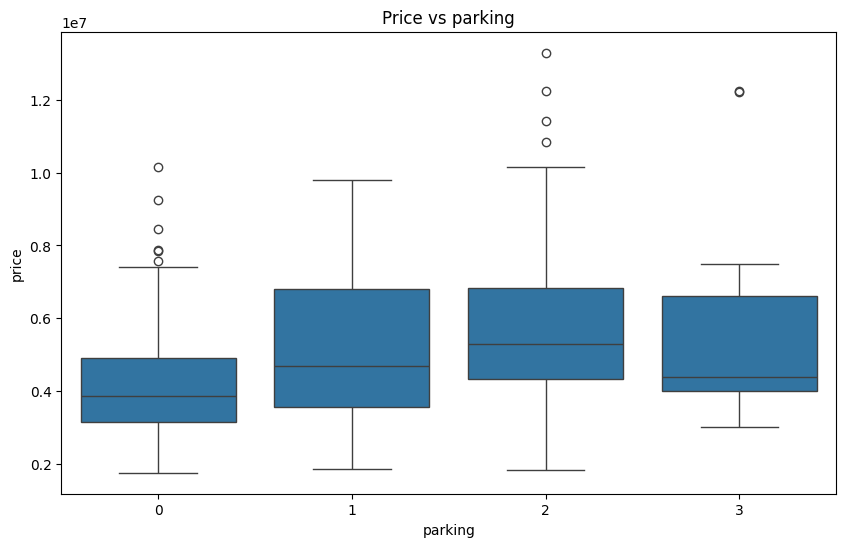

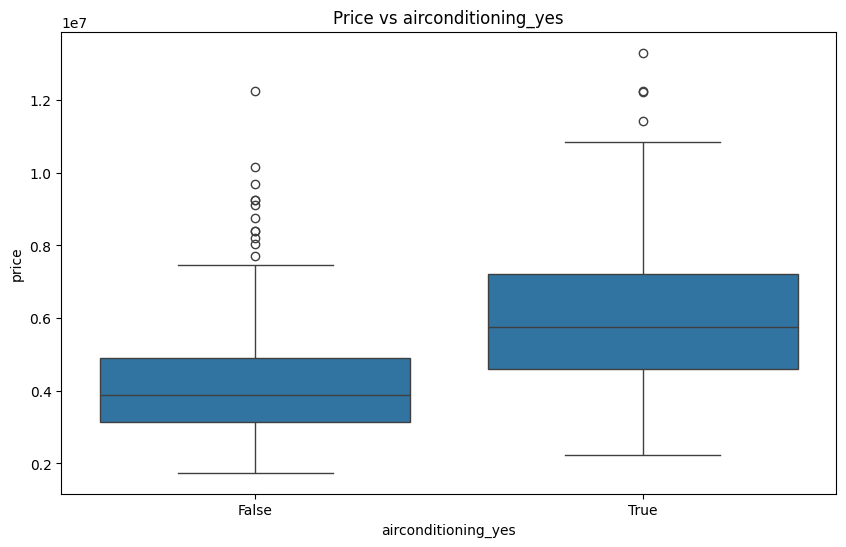

In [14]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Scatter Plot: Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

categorical_features = ['bedrooms', 'bathrooms', 'guestroom_yes', 'basement_yes', 'parking','airconditioning_yes']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'Price vs {feature}')
    plt.show()

In [16]:
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

In [17]:
df['bedrooms'].unique()


array([4., 3., 5., 2., 6., 1.])

In [18]:
scaler = StandardScaler()
numerical_features = ['area', 'bedrooms', 'bathrooms', 'parking']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [19]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1676149101214.0078
R-squared: 0.6357355027517286


In [ ]:
df.to_csv("final1.csv",index=fa)

In [ ]:
from google.colab import files
files.download('final1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
df_test = X_test.copy()
df_test['Actual Price'] = y_test
df_test['Predicted Price'] = y_pred
print(df_test.head())

         area  bedrooms  bathrooms  stories   parking  mainroad_yes  \
234 -0.579054  0.055488   1.452757        2  1.520083          True   
78   0.260659  0.055488  -0.563924        1  1.520083          True   
526 -0.902020 -1.306499  -0.563924        1 -0.798688          True   
91   0.745108 -1.306499  -0.563924        1  1.520083          True   
474 -0.361282  1.417476  -0.563924        2  0.360698         False   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
234          False          True                False                False   
78            True          True                False                 True   
526          False         False                False                False   
91            True          True                False                False   
474          False         False                False                False   

     prefarea_yes  furnishingstatus_semi-furnished  \
234         False                             True

In [35]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [36]:
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'parking']
df_cleaned = remove_outliers(df, numerical_features)


In [37]:
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)

In [29]:
scaler = StandardScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])


In [30]:
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.7149770808474566
R-squared: 0.42214621006434705


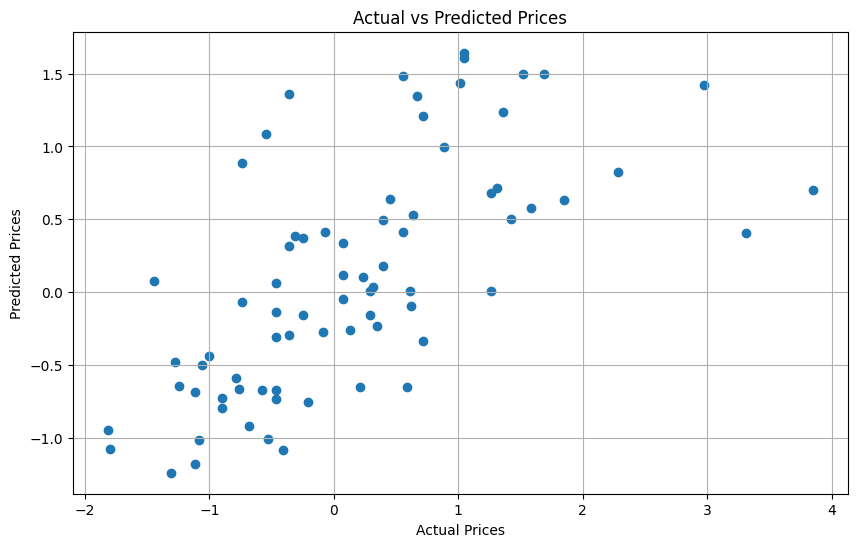

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()